In [32]:
%matplotlib inline
from syk_susy_2 import *
import numpy as np
from numpy import linalg as LA
import scipy.linalg as SLA
import matplotlib.pyplot as plt
import manipulate
from importlib import reload
reload(manipulate)
import math

In [2]:
def random_sum()

SyntaxError: invalid syntax (<ipython-input-2-f33930c34801>, line 1)

In [17]:
H = hamiltonian(9,1)
w, v = manipulate.eigen(H)

In [18]:
w = manipulate.set_zeros(w)
Ha = manipulate.reconstruct(w,v)
print(np.min(Ha-H))

(-8.881784197e-15-2.77555756156e-16j)


In [20]:
ngs = sum(w==0)
tot_gs = np.copy(v[:,0])
for i in range(1,ngs):
    tot_gs += v[:,i]
tot_gs = tot_gs/math.sqrt(ngs)
# print(tot_gs)

In [ ]:
manipulate.entropy(rho)
# manipulate.entropy(np.asarray([[1,0,0],[0,0,0],[0,0,0]])) # = 0

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/cstahl/Documents/Junior/Junior Paper II/python/manipulate.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  r[idx, jdx] = rho[idx, jdx] + rho[idx + N/2, jdx + N/2]


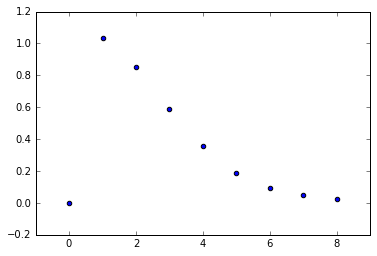

In [22]:
rho = manipulate.density_mat(tot_gs)
entropies = np.zeros(9)
rhoi = np.copy(rho)
for idx, val in enumerate(entropies):
    if idx != 0: rhoi = manipulate.single_trace(rhoi)
    entropies[idx] = manipulate.entropy(rhoi)
plt.scatter(range(9), entropies)

In [14]:
entropies[4]

nan

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/cstahl/Documents/Junior/Junior Paper II/python/manipulate.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  r[idx, jdx] = rho[idx, jdx] + rho[idx + N/2, jdx + N/2]


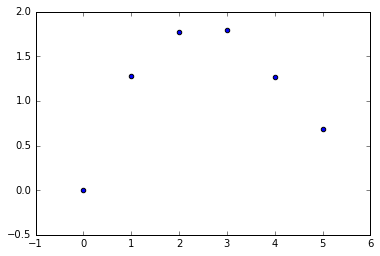

N =  6 entropy[2] =  1.768341477


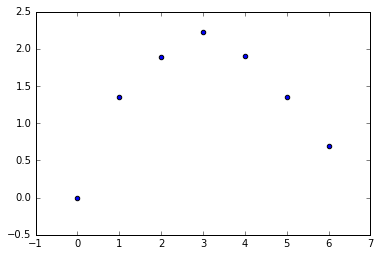

N =  7 entropy[2] =  1.89642204366


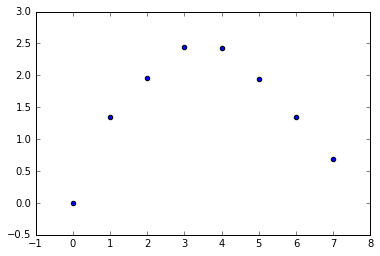

N =  8 entropy[2] =  1.96072114734


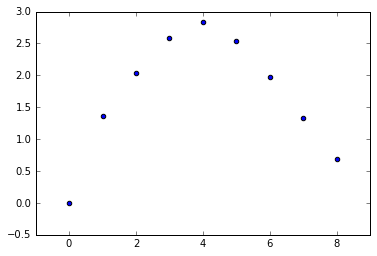

N =  9 entropy[2] =  2.03184175598


In [36]:
for N in [6,7,8,9]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N), entropies)
    plt.savefig("../data/entropy0%s.pdf" % N)
    plt.show()
    print("N = ", N, "entropy[2] = ", entropies[2])

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/cstahl/Documents/Junior/Junior Paper II/python/manipulate.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  r[idx, jdx] = rho[idx, jdx] + rho[idx + N/2, jdx + N/2]


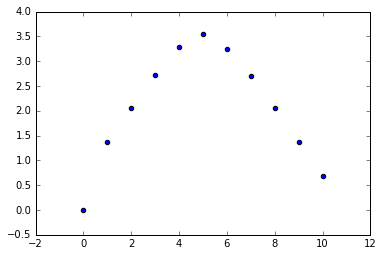

N =  11 entropy[2] =  2.05832730354


In [37]:
for N in [11]:
    H = hamiltonian(N,1)
    w, v = manipulate.eigen(H)
    w = manipulate.set_zeros(w)
    ngs = sum(w==0)
    tot_gs = np.copy(v[:,0])
    for i in range(1,ngs):
        tot_gs += v[:,i]
    tot_gs = tot_gs/math.sqrt(ngs)
    rho = manipulate.density_mat(tot_gs)
    entropies = np.zeros(N)
    rhoi = np.copy(rho)
    for idx, val in enumerate(entropies):
        if idx != 0: rhoi = manipulate.single_trace(rhoi)
        entropies[idx] = manipulate.entropy(rhoi)
    plt.scatter(range(N), entropies)
    plt.savefig("../data/entropy%s.pdf" % N)
    plt.show()
    print("N = ", N, "entropy[2] = ", entropies[2])

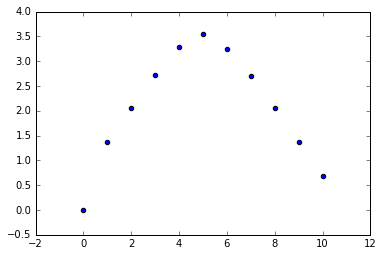

In [45]:
plt.scatter(range(len(entropies)), entropies)
plt.savefig("../data/entropy%s.pdf" % N)
plt.show()